In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

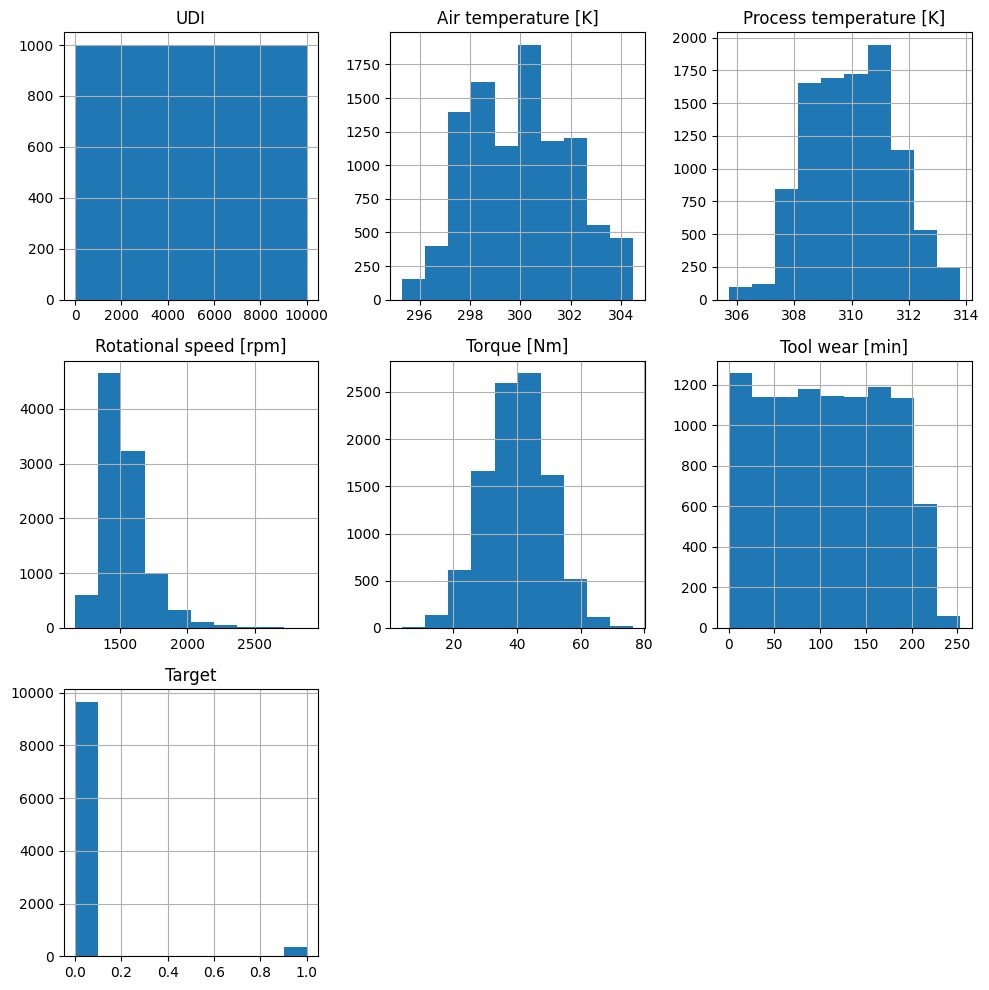

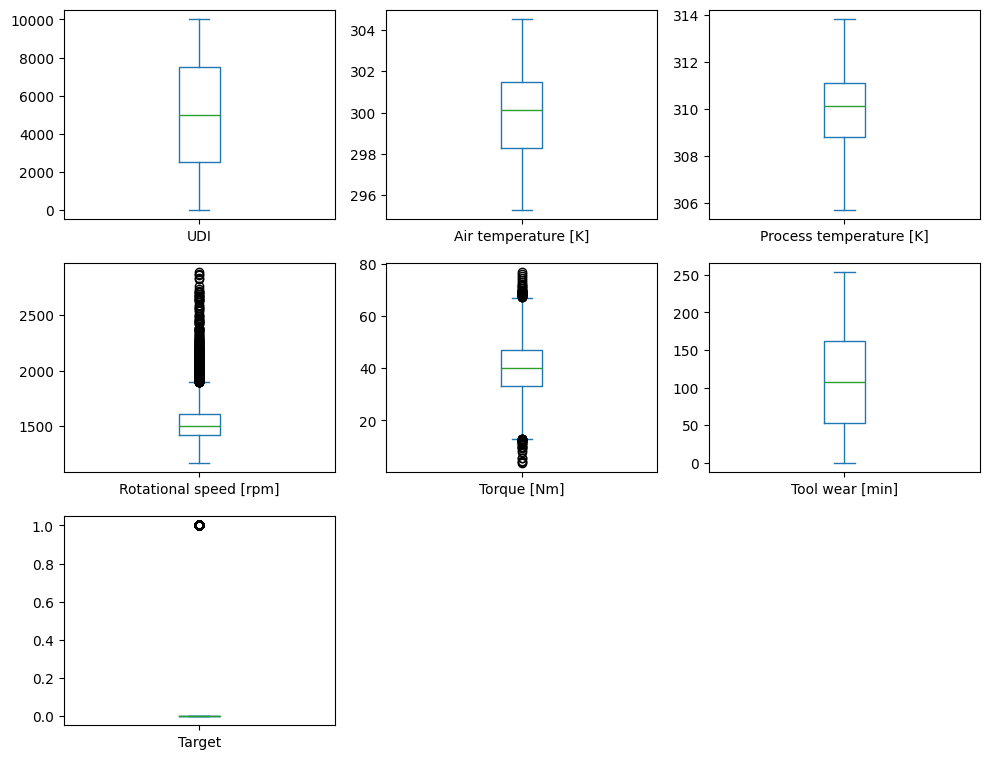

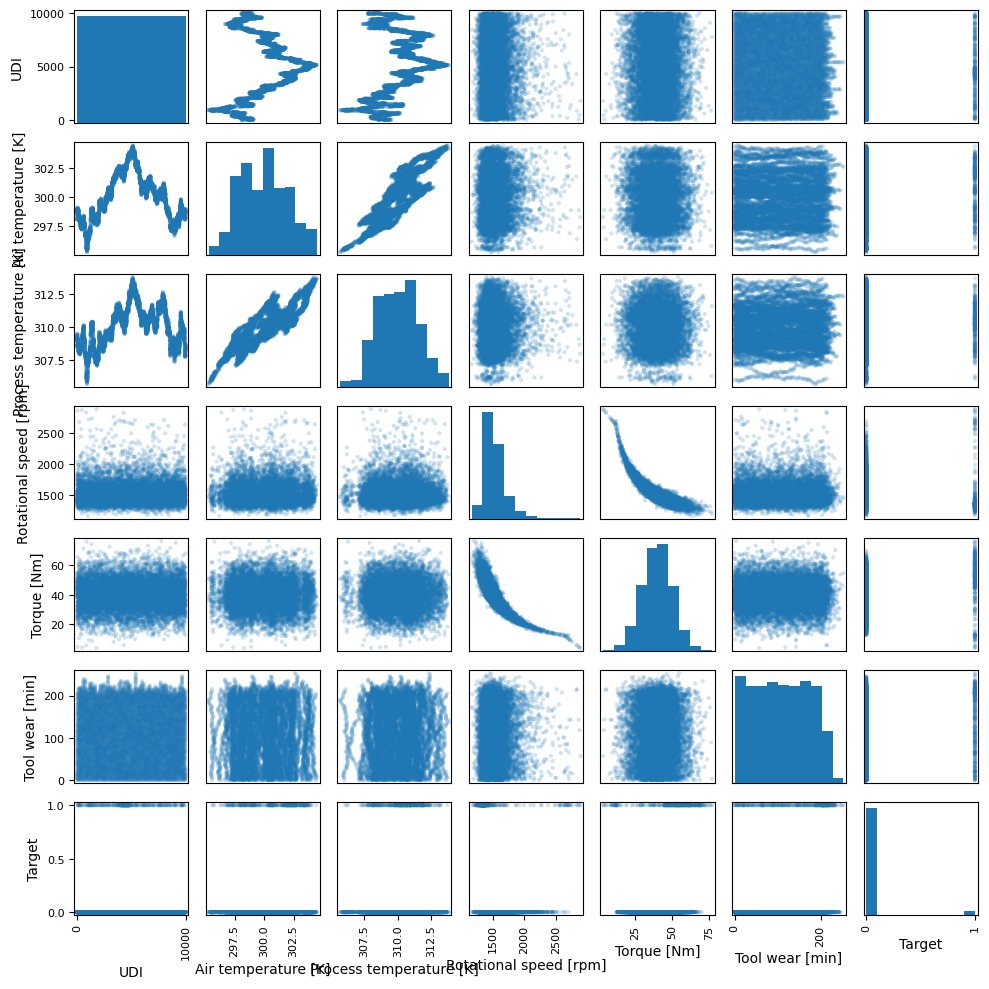

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('predictive_maintenance.csv')

# Histograms for each feature
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(10,10))
plt.tight_layout()
plt.show()

# Scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.tight_layout()
plt.show()

In [27]:
df = pd.read_csv('predictive_maintenance.csv')

In [28]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [30]:
df['Type'].nunique()

3

In [31]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#Some Understandings : <br>
1. First we need to transform some columns by ordinal encoding/ label encoding<br>
2. There are no missing values<br>
3. `Type` Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here<br>
The target variable here is `Target` only, i.e. to predict failure or not
4. Notice that, there are two output target variables `Target` and `Failure Type`<br> So prediect here multiclass Failure Type Variable<br>

5. This is a classification problem <br>

In [32]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [33]:
X = df.iloc[:,2:8]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
y_train.shape

(7500,)

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
oe.fit(X_train[['Type']])
X_train['Type'] = oe.transform(X_train[['Type']]).astype(int)
X_test['Type'] = oe.transform(X_test[['Type']]).astype(int)

In [35]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4901,1,303.6,312.3,1630,32.4,223
4375,0,302.0,309.7,1414,36.3,209
6698,0,301.6,310.8,1418,44.7,46
9805,0,298.4,309.2,1651,28.5,141
1101,2,296.7,307.5,1607,33.6,38


In [36]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 98.15 %
Model Accuracy Score : 98.08 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2424
           1       0.73      0.40      0.52        20
           2       0.86      0.78      0.82        23
           3       0.82      0.60      0.69        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2500
   macro avg       0.56      0.46      0.50      2500
weighted avg       0.97      0.98      0.98      2500

--------------------------------------------------------


c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)
p
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.52 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2424
           1       0.86      0.90      0.88        20
           2       0.75      0.78      0.77        23
           3       0.53      0.53      0.53        15
           4       0.07      0.08      0.08        12
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2500
   macro avg       0.53      0.55      0.54      2500
weighted avg       0.98      0.98      0.98      2500

--------------------------------------------------------


In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.52 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2424
           1       0.94      0.80      0.86        20
           2       0.86      0.78      0.82        23
           3       0.90      0.60      0.72        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2500
   macro avg       0.61      0.53      0.57      2500
weighted avg       0.98      0.99      0.98      2500

--------------------------------------------------------


c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [40]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.49 %
Model Accuracy Score : 97.04 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2424
           1       0.00      0.00      0.00        20
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2500
   macro avg       0.33      0.18      0.19      2500
weighted avg       0.95      0.97      0.96      2500

--------------------------------------------------------


c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [41]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))

In [42]:
import joblib

# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'model.joblib')

['model.joblib']

In [43]:
import joblib

# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'rfc_smote_1.joblib')

['rfc_smote_1.joblib']

In [44]:
columns = df.columns.tolist()
columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']